![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# Loading Libraries
All Python capabilities are not loaded into our working environment by default (even those that are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are the most commonly used libraries. Numpy is required for calculations like mean, median, square roots, etc. Pandas is used for data processing and data frames. We choose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

Note: You can import all the libraries that you think will be required or can import it as you go along. 

Here we will be importing the following libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

# Loading Dataset
Pandas module is used for reading files.

You can learn more about pandas [here](https://dphi.tech/learn/introduction-to-pandas)

In [2]:
df = pd.read_csv(r"./train_dataset.csv")

# **Basic EDA**

In [3]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [4]:
df.shape

(18137, 18)

In [5]:
df[['no_of_weekend_nights', 'booking_status']].value_counts(normalize=True)

no_of_weekend_nights  booking_status
0                     0                 0.325081
1                     0                 0.179523
2                     0                 0.164140
0                     1                 0.140486
1                     1                 0.095330
2                     1                 0.085902
3                     0                 0.002426
                      1                 0.002205
4                     1                 0.002150
                      0                 0.000937
5                     1                 0.000882
6                     1                 0.000606
5                     0                 0.000165
6                     0                 0.000110
7                     1                 0.000055
dtype: float64

In [6]:
df[['no_of_week_nights', 'booking_status']].value_counts(normalize=True)

no_of_week_nights  booking_status
2                  0                 0.205050
1                  0                 0.190329
3                  0                 0.145338
2                  1                 0.109004
3                  1                 0.071125
1                  1                 0.070298
4                  0                 0.051717
0                  0                 0.047086
4                  1                 0.031262
5                  0                 0.027127
0                  1                 0.019518
5                  1                 0.018029
6                  1                 0.002536
                   0                 0.002426
7                  0                 0.001654
                   1                 0.001489
10                 1                 0.001489
8                  1                 0.000827
                   0                 0.000827
9                  1                 0.000717
                   0                 0.000331


In [7]:
df['no_of_weekend_nights'] = df['no_of_weekend_nights'].apply(lambda x: int(x<=2))

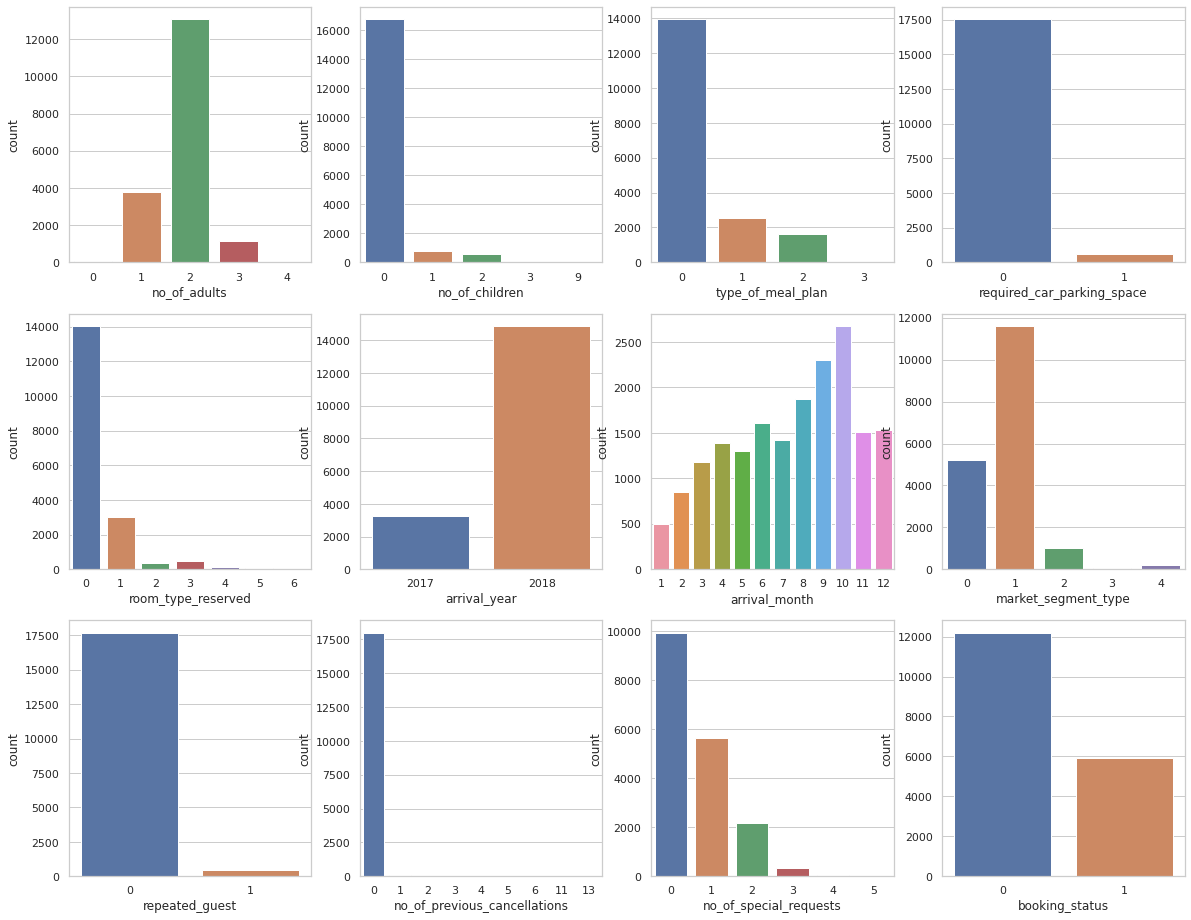

In [8]:
fig, ax = plt.subplots(3,4, figsize=(20,16))
sns.countplot(data=df,x='no_of_adults', ax=ax[0][0])
sns.countplot(data=df,x='no_of_children', ax=ax[0][1])
sns.countplot(data=df,x='type_of_meal_plan', ax=ax[0][2])
sns.countplot(data=df,x='required_car_parking_space', ax=ax[0][3])
sns.countplot(data=df,x='room_type_reserved', ax=ax[1][0])
sns.countplot(data=df,x='arrival_year', ax=ax[1][1])
sns.countplot(data=df,x='arrival_month', ax=ax[1][2])
sns.countplot(data=df,x='market_segment_type', ax=ax[1][3])
sns.countplot(data=df,x='repeated_guest', ax=ax[2][0])
sns.countplot(data=df,x='no_of_previous_cancellations', ax=ax[2][1])
sns.countplot(data=df,x='no_of_special_requests', ax=ax[2][2])
sns.countplot(data=df,x='booking_status', ax=ax[2][3])
plt.show()


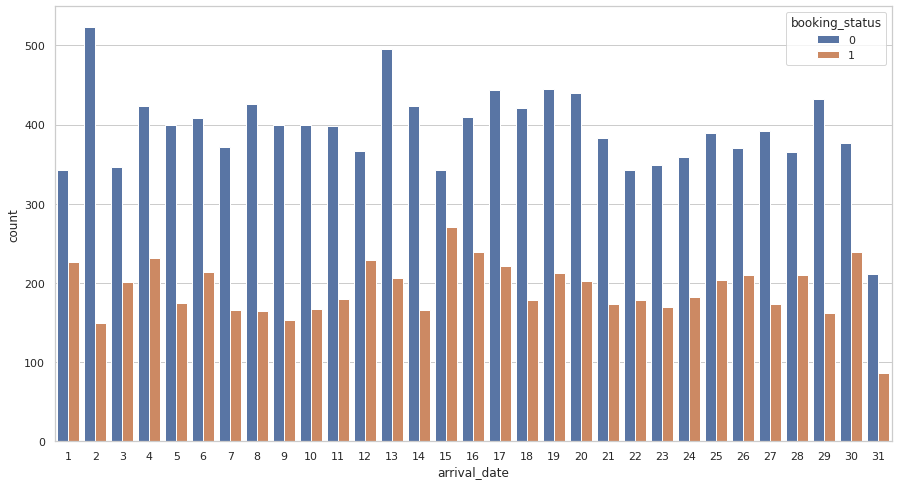

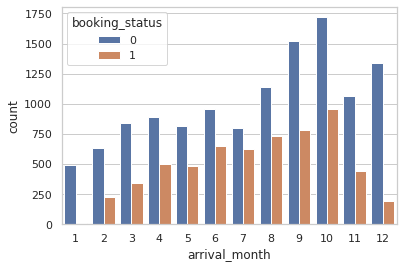

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='arrival_date', hue='booking_status')
plt.show()
sns.countplot(data=df, x='arrival_month', hue='booking_status')
plt.show()

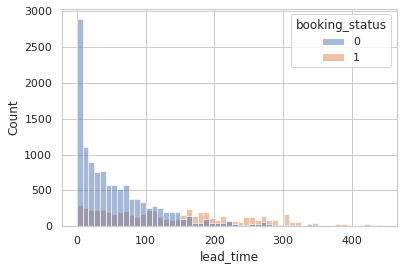

In [10]:
sns.histplot(data=df, x='lead_time', hue='booking_status')

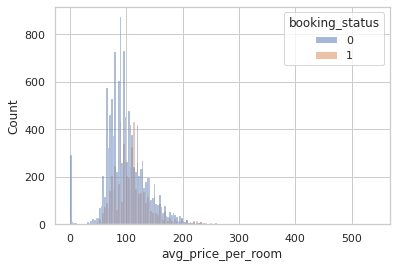

In [11]:
sns.histplot(data=df, x='avg_price_per_room', hue='booking_status')

In [12]:
df[['arrival_month', 'booking_status']].value_counts(normalize=True)

arrival_month  booking_status
10             0                 0.094779
9              0                 0.083751
12             0                 0.073772
8              0                 0.062690
11             0                 0.058554
10             1                 0.052875
6              0                 0.052655
4              0                 0.049016
3              0                 0.046149
5              0                 0.045156
7              0                 0.044164
9              1                 0.043116
8              1                 0.040304
6              1                 0.035949
2              0                 0.034736
7              1                 0.034239
4              1                 0.027403
1              0                 0.026961
5              1                 0.026796
11             1                 0.024425
3              1                 0.018691
2              1                 0.012295
12             1                 0.010862
1   

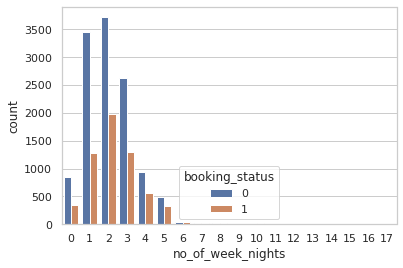

In [13]:
sns.countplot(data=df, x='no_of_week_nights', hue='booking_status')

In [14]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000
mean,1.846777,0.107515,0.990461,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618
std,0.516020,0.408901,0.097201,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000
max,4.000000,9.000000,1.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [15]:
df['arrival_month'] = df['arrival_month'].apply(lambda x: int(x<4))
df['lead_time'] = df['lead_time'].apply(lambda x: int(x>150))

# Insights  

- It seems majority of the bookings always had 2 adults and no children.  
- At least 50% of the guests would for at least 1 weekend night and some of them would stay over 2 nights.  
- During weekdays, most of the guests would spend their nights at the hotel.  
- About 75% of the guests had no meal plan nor required parking space.
- In few cases, guests booked the room and checked in immediately. In other few cases, guests booked their room a year in advance.  
- On average, the guest booked their rooms at most 3 months in advance. Most of the bookings were in 2018.
- Majority of the guests are new (not repeated). Is the hotel good enough to bring back guests?

In [16]:
df['booking_status'].value_counts()

0    12195
1     5942
Name: booking_status, dtype: int64

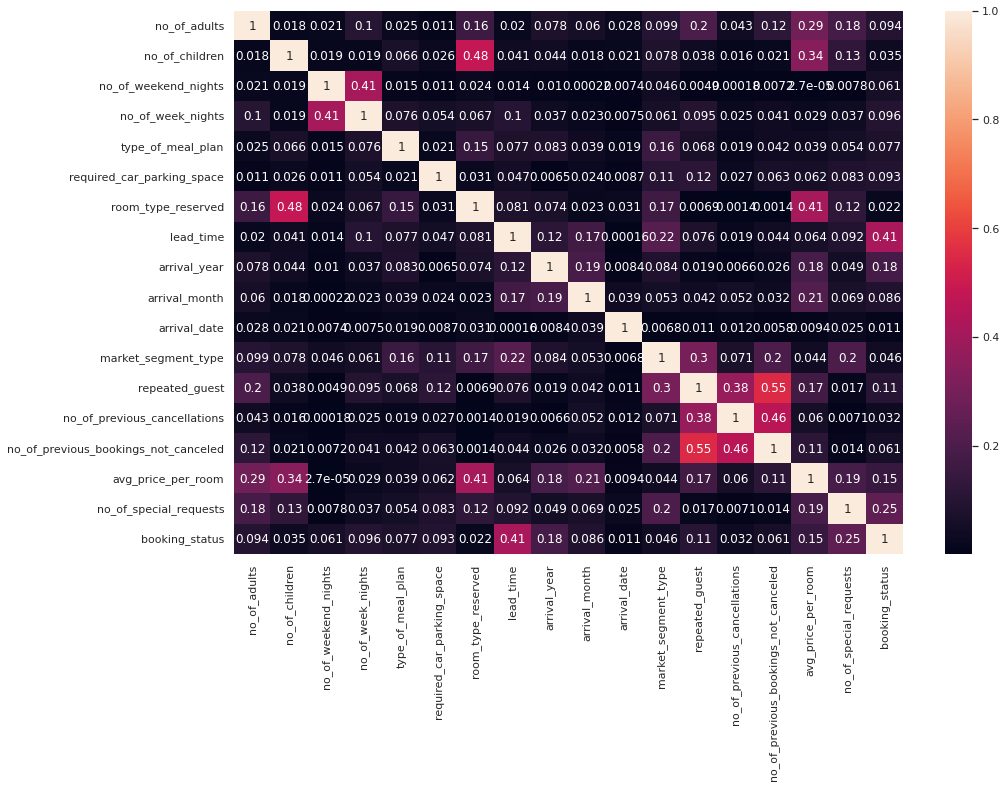

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), annot=True)

In [18]:
df.drop(labels=['room_type_reserved','repeated_guest', 'no_of_previous_cancellations', \
                'no_of_previous_bookings_not_canceled', 'no_of_weekend_nights', 'no_of_week_nights',\
                'arrival_year'], axis=1,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_adults                18137 non-null  int64  
 1   no_of_children              18137 non-null  int64  
 2   type_of_meal_plan           18137 non-null  int64  
 3   required_car_parking_space  18137 non-null  int64  
 4   lead_time                   18137 non-null  int64  
 5   arrival_month               18137 non-null  int64  
 6   arrival_date                18137 non-null  int64  
 7   market_segment_type         18137 non-null  int64  
 8   avg_price_per_room          18137 non-null  float64
 9   no_of_special_requests      18137 non-null  int64  
 10  booking_status              18137 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.5 MB


# Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we want to predict whether the meteor is a threat to the Earth or not, so the variable **Hazardous** is our target variable and remaining features are input variable.

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [20]:
# Input/independent variables
X = df.drop('booking_status', axis = 1)   # here we are dropping the Target feature as this is the target and 'X' is input features, the changes are not 
                                            # made inplace as we have not used 'inplace = True'

y = df['booking_status']             # Output/Dependent variable

# Splitting the data into Train and Test Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.

For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
X_train.shape

(12695, 10)

In [23]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

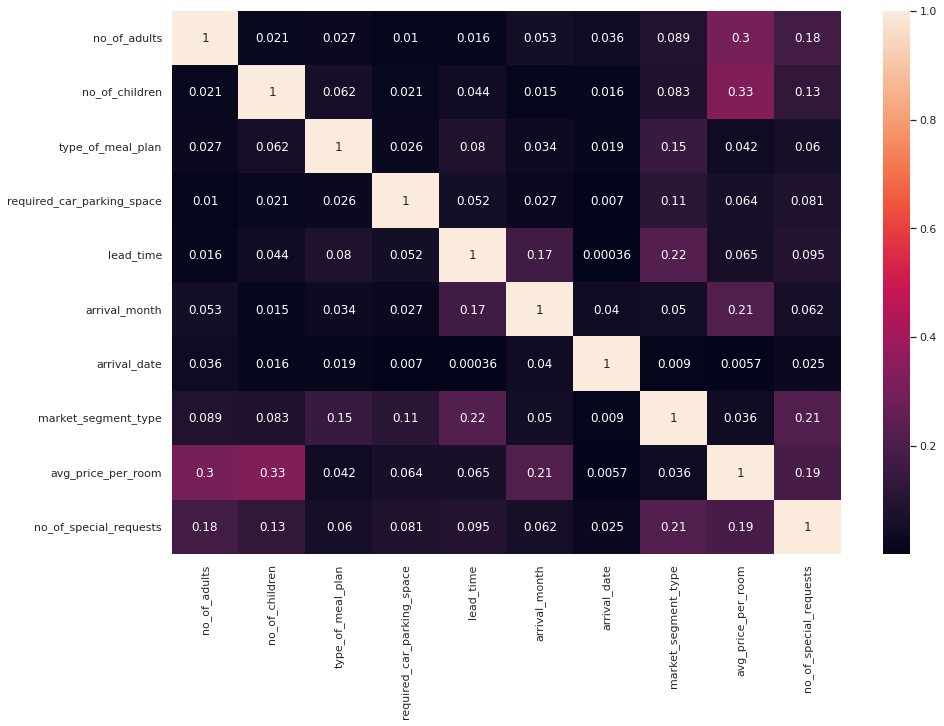

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(X_train.corr()), annot=True)

# Building Model
Now we are finally ready, and we can train the model.

There are tons of Machine Learning models like Logistic Regression, Random Forest, Decision Tree, etc. to say you some. However here we are using RandomForest Classifier (using the sklearn library).

Then we would feed the model both with the data (X_train) and the answers for that data (y_train)

### Train the model

In [25]:
# from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [26]:
X_train.shape

(12695, 10)

In [73]:
model = Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics='accuracy')

In [74]:
es = EarlyStopping(monitor='loss', min_delta=0.001, patience=10, verbose=1)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose = 1, callbacks=[es])

Epoch 1/100
397/397 [==============================] - 2s 2ms/step - loss: 0.4479 - accuracy: 0.7989
Epoch 2/100
397/397 [==============================] - 1s 2ms/step - loss: 0.4242 - accuracy: 0.8117
Epoch 3/100
397/397 [==============================] - 1s 2ms/step - loss: 0.4175 - accuracy: 0.8126
Epoch 4/100
397/397 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8167
Epoch 5/100
397/397 [==============================] - 1s 2ms/step - loss: 0.4075 - accuracy: 0.8169
Epoch 6/100
397/397 [==============================] - 1s 2ms/step - loss: 0.4047 - accuracy: 0.8199
Epoch 7/100
397/397 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8180
Epoch 8/100
397/397 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8173
Epoch 9/100
397/397 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8216
Epoch 10/100
397/397 [==============================] - 1s 2ms/step - loss: 0.3940 - accura

In [76]:
model.evaluate(X_train, y_train)

397/397 [==============================] - 1s 1ms/step - loss: 0.3322 - accuracy: 0.8424


[0.33216968178749084, 0.8423789143562317]

# Validate The Model
Wonder🤔 how well your model learned! Lets check it.

# Predict on the testing data (X_test)
Now we predict using our trained model on the test set we created i.e. X_test and evaluate our model on unforeseen data.

In [77]:
pred = model.predict(X_test)

171/171 [==============================] - 1s 1ms/step


In [78]:
# pred = tf.cast(pred >= 0.5, tf.int32).numpy()
pred = (pred >= 0.5).astype(int)
# pred

## Model Evaluation
Evaluating performance of the machine learning model that we have built is an essential part of any machine learning project. Performance of our model is done using some evaluation metrics.

There are so many evaluation metrics to use for regression problem, naming some - Accuracy Score, F1 Score, Precision, Recall etc. However, **Accuracy Score** is the metric for this challenge. 

In [79]:
from sklearn.metrics import accuracy_score

# Checking the accuracy of the Validation dataset

print('Accuracy score',accuracy_score(X_test,y_test))

In [80]:
print('Accuracy score',accuracy_score(pred,y_test))

Accuracy score 0.8314957736126424


Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. testing_set_label.csv) given in 'Data' section of the problem page.

## Load Test Set
Load the test data on which final submission is to be made.

In [81]:
test_data = pd.read_csv(r'./test_dataset.csv')

**Note:** 
*  Use the same techniques to deal with missing values as done with the training dataset.   

*  **Don't remove any observation/record from the test dataset otherwise you will get wrong answer. The number of items in your prediction should be same as the number of records are present in the test dataset**.

*  Use the same techniques to preprocess the data as done with training dataset.

***Why do we need to do the same procedure of filling missing values, data cleaning and data preprocessing on the new test data as it was done for the training and validation data?***

**Ans:** Because our model has been trained on certain format of data and if we don't provide the testing data of the similar format, the model will give erroneous predictions and the rmse of the model will increase. Also, if the model was build on 'n' number of features, while predicting on new test data you should always give the same number of features to the model. In this case if you provide different number of features while predicting the output, your ML model will throw a ValueError saying something like 'number of features given x; expecting n'. Not confident about these statements? Well, as a data scientist you should always perform some experiment and observe the results.



In [82]:
test_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,1,0,65,2018,3,28,1,0,0,0,96.3,0
1,2,0,0,2,0,0,0,322,2018,12,9,0,0,0,0,52.0,0
2,1,0,2,3,0,0,0,115,2018,2,27,0,0,0,0,75.0,0
3,2,0,2,0,2,0,0,386,2018,10,23,1,0,0,0,115.0,1
4,2,0,1,4,0,0,1,51,2018,8,31,1,0,0,0,123.3,0


In [83]:
test_data.no_of_weekend_nights.value_counts()

0    8428
1    5010
2    4536
4      73
3      69
5      15
6       7
Name: no_of_weekend_nights, dtype: int64

## Make Prediction on Test Dataset
Time to make submission!!!

In [84]:
test_data['arrival_month'] = test_data['arrival_month'].apply(lambda x: int(x<4))
test_data['lead_time'] = test_data['lead_time'].apply(lambda x: int(x>150))
test_data = test_data[X.columns]
test_data_scaled = pd.DataFrame(scaler.transform(test_data), columns=X.columns)

In [85]:
target = model.predict(test_data_scaled)
target = (target >= 0.5).astype(int)

567/567 [==============================] - 1s 1ms/step


In [86]:
target

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

#### Note: **Follow the submission guidelines given in 'How To Submit' Section.**

## How to save prediciton results locally via jupyter notebook?
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results.csv' will be created in your current working directory.

In [87]:
#target = pd.read_csv(r'test_ans.csv')
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.columns = ["booking_status"]
res.to_csv("submission.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.

Thanks you for checking out the notebook. If you have any suggestion on improving it. Feel free to share it with me @ claim.akshar@gmail.com